# Introduction


This is a transnational dataset containing all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts, with a significant portion of customers being wholesalers.

# Problem

Suppose you are the head of this store and you wish to understand the preferences of your customers to scale up your business. Is it possible for you to look at the details of each customer and devise a unique business strategy for each one of them? Definitely not. But what you can do is to cluster all your customers into, say, 10 groups based on their purchasing habits and use a separate strategy for customers in each of these 10 groups. And this is what we call clustering.

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms


In [112]:
file_path = 'data/Online Retail.csv'

df = pd.read_csv(file_path)
print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Exploratory Data Analysis

In [113]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [115]:
df.duplicated().sum()

5268

In [116]:
df.drop_duplicates(inplace=True)

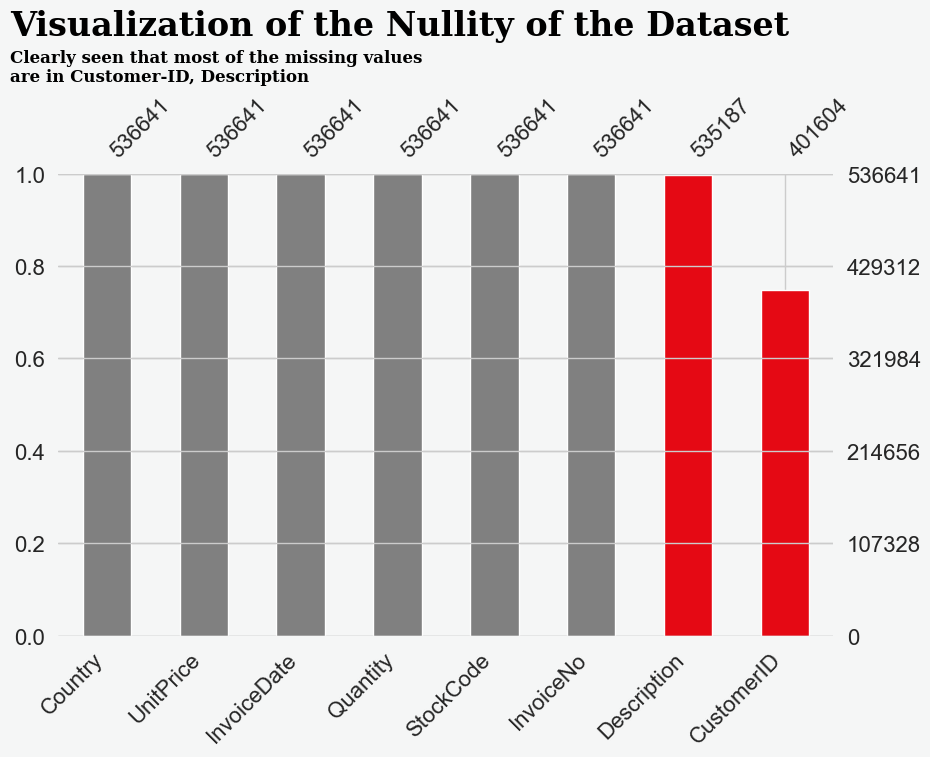

In [117]:
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#f5f6f6')
fig.patch.set_facecolor('#f5f6f6')

# Define colors for bars
color = ['grey'] * 6 + ['#E50914'] * 4

# Plot missing values using missingno library
ms.bar(df, fontsize=16, color=color, sort='descending', ax=ax)

# Add title and subtitle
title_props = {'font': 'serif', 'color': 'black', 'weight': 'bold', 'size': 24}
subtitle_props = {'font': 'serif', 'color': 'black', 'weight': 'bold', 'size': 12}

ax.text(-1, 1.3, 'Visualization of the Nullity of the Dataset', title_props)
ax.text(-1, 1.2, 'Clearly seen that most of the missing values\nare in Customer-ID, Description', subtitle_props)

# Show the plot
plt.show()


In [118]:

# drop all rows having missing values
df = df.dropna()
df.shape

(401604, 8)

let's create a new column amount

In [119]:
df["amount"]=df["Quantity"]*df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


# Preprocessing

# RFM Analysis

RFM (Recency, Frequency, Monetary)  analysis is a proven marketing model for behavior based customer segmentation. It groups customers based on their transaction history – how recently, how often and how much did they buy.
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization service.

Valuing customers based on a single parameter is insufficient.

For example, you can say that people who spend the most are your best customers. Most of us agree and think the same.

But wait! What if they purchased only once? Or a very long time ago? What if they are no longer using your product?

So..can they still be considered your best customers? Probably not.

Judging customer value on just one aspect will give you an inaccurate report of your customer base and their lifetime value.

That’s why, RFM model combines three different customer attributes to rank customers.

If they bought in recent past, they get higher points. If they bought many times, they get higher score. And if they spent bigger, they get more points. Combine these three scores to create the RFM score.

Finally you can segment your customer database into different groups based on this Recency – Frequency – Monetary score.


## Monetary

In [120]:
rmf_df = (
    df.groupby('CustomerID')['amount']
    .sum()
    .reset_index()
    .rename(columns={'amount': 'Monetary'})
)

rmf_df.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


## Frequency

In [121]:
frequency_df = (
    df.groupby('CustomerID')['InvoiceNo']
    .count()
    .reset_index()
    .rename(columns={'InvoiceNo': 'Frequency'})
)

rmf_df = rmf_df.merge(frequency_df, on='CustomerID')
rmf_df.head()

,CustomerID,Monetary,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


## Recency

In [122]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Compute the max date
max_date = max(df['InvoiceDate'])

# Compute the diff
df['diff'] = max_date - df['InvoiceDate']

# Recency DataFrame
recency_df = (
    df.groupby('CustomerID')
    .agg(recency=('diff', 'min'))
    .reset_index()
)

## Convert timedelta to days
recency_df['recency'] = recency_df['recency'].dt.days

# Merge recency_df with rmf_df
rmf_df = pd.merge(rmf_df, recency_df, on='CustomerID', how='inner')

# Rename columns in the merged DataFrame
rmf_df.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency']

# Display the first few rows of the merged DataFrame
rmf_df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


## Data Visualizations

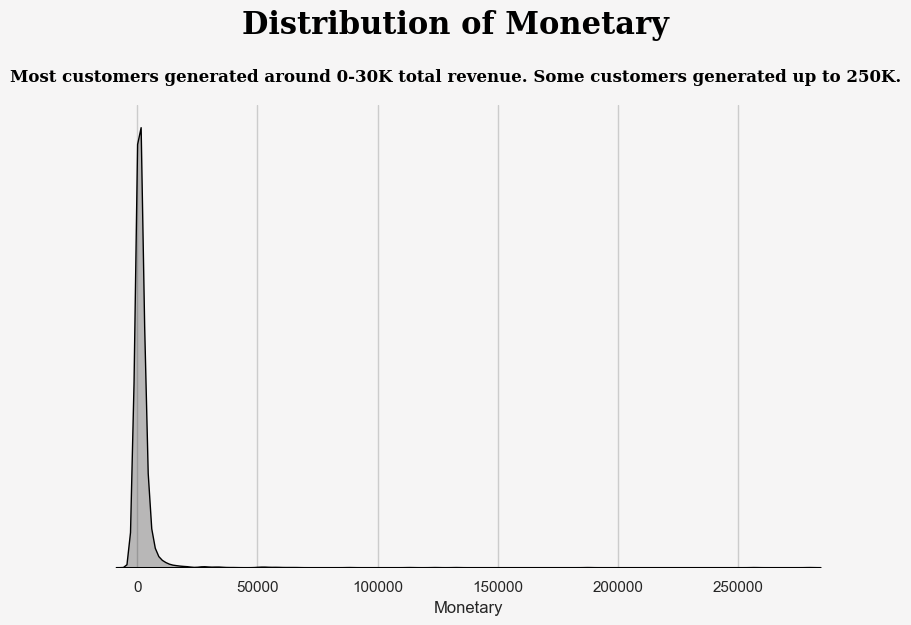

In [123]:
def plot_distribution(data, column, title, description):
    """
    Plot KDE distribution for a given column in the DataFrame.

    Parameters:
    - data: DataFrame
    - column: str, column name to plot
    - title: str, plot title
    - description: str, plot description
    """
    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the KDE distribution
    sns.kdeplot(data[column], color="black", fill=True, ax=ax)

    # Set background colors
    fig.patch.set_facecolor('#f6f5f5')
    ax.set_facecolor('#f6f5f5')

    # Remove unnecessary axis elements
    ax.axes.get_yaxis().set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Add title and subtitle
    fig.text(0.5, 1, title, {'font': 'Serif', 'weight': 'bold', 'size': 22, 'color': 'black'},
             ha='center')
    fig.text(0.5, 0.92, description, {'font': 'Serif', 'weight': 'bold', 'size': 12, 'color': 'black'}, ha='center')

    # Show the plot
    plt.show()


# Plot distribution of 'Monetary'
plot_distribution(rmf_df, "Monetary", "Distribution of Monetary", "Most customers generated around 0-30K total revenue. Some customers generated up to 250K.")

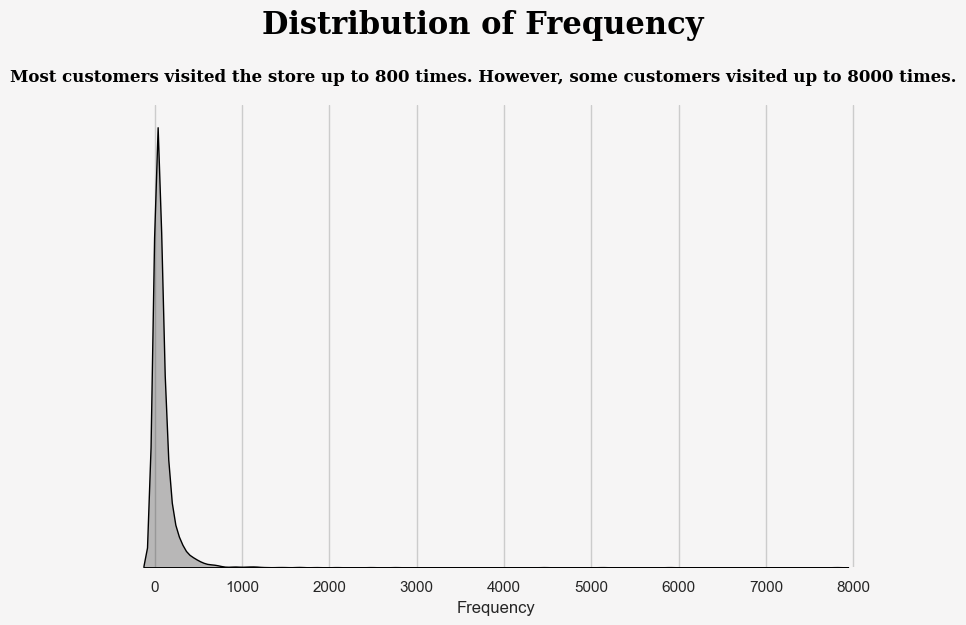

In [124]:
## Plot distribution of 'Frequency'
plot_distribution(rmf_df, "Frequency", "Distribution of Frequency", "Most customers visited the store up to 800 times. However, some customers visited up to 8000 times.")

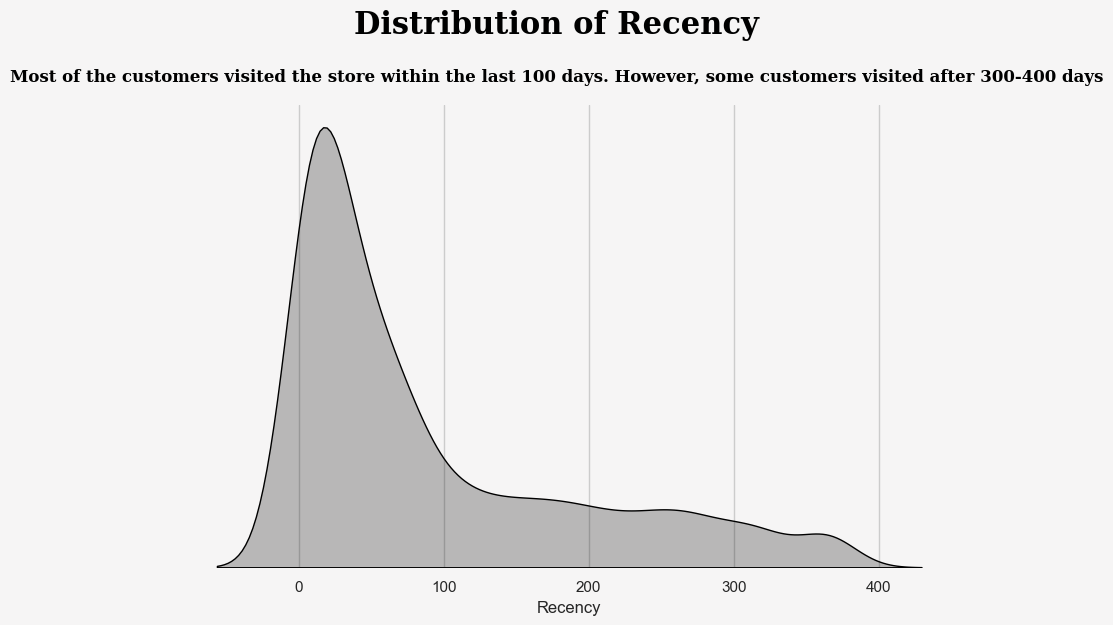

In [125]:
## Plot distribution of 'Recency'
plot_distribution(rmf_df, "Recency", "Distribution of Recency", "Most of the customers visited the store within the last 100 days. However, some customers visited after 300-400 days")

c:\Users\Lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


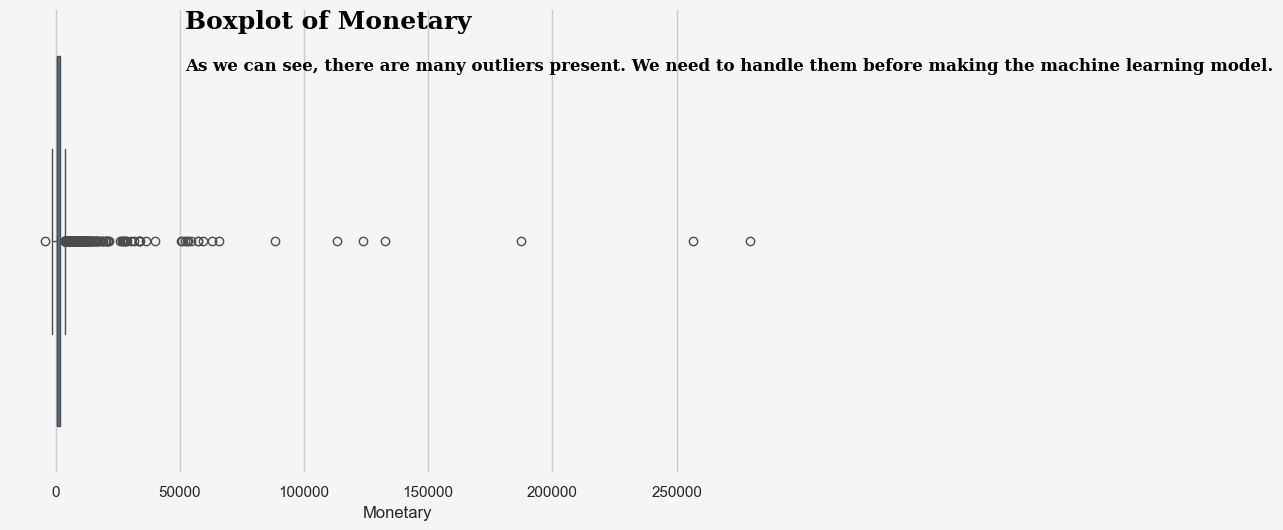

In [126]:
def boxplot(data, column, title, description, horizontal=False):
    """
    Create a boxplot for a given column in the DataFrame.

    Parameters:
    - data: DataFrame
    - column: str, column name to create a boxplot
    - title: str, plot title
    - description: str, plot description
    - horizontal: bool, whether to create a horizontal boxplot (default is False)
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create a boxplot
    sns.boxplot(x=data[column] if not horizontal else None, y=data[column] if horizontal else None, ax=ax, orient='h' if horizontal else 'v')

    # Remove spines
    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)

    # Set background colors
    fig.patch.set_facecolor('#f6f5f5')
    ax.set_facecolor('#f6f5f5')

    # Add title and description
    fig.text(0.3, 0.85, title, fontweight="bold", fontfamily='serif', fontsize=18, color='black')
    fig.text(0.3, 0.78, description, fontweight="bold", fontfamily='serif', fontsize=12, color='black')

    # Show the plot
    plt.show()

boxplot(rmf_df, "Monetary", "Boxplot of Monetary", "As we can see, there are many outliers present. We need to handle them before making the machine learning model.")


c:\Users\Lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


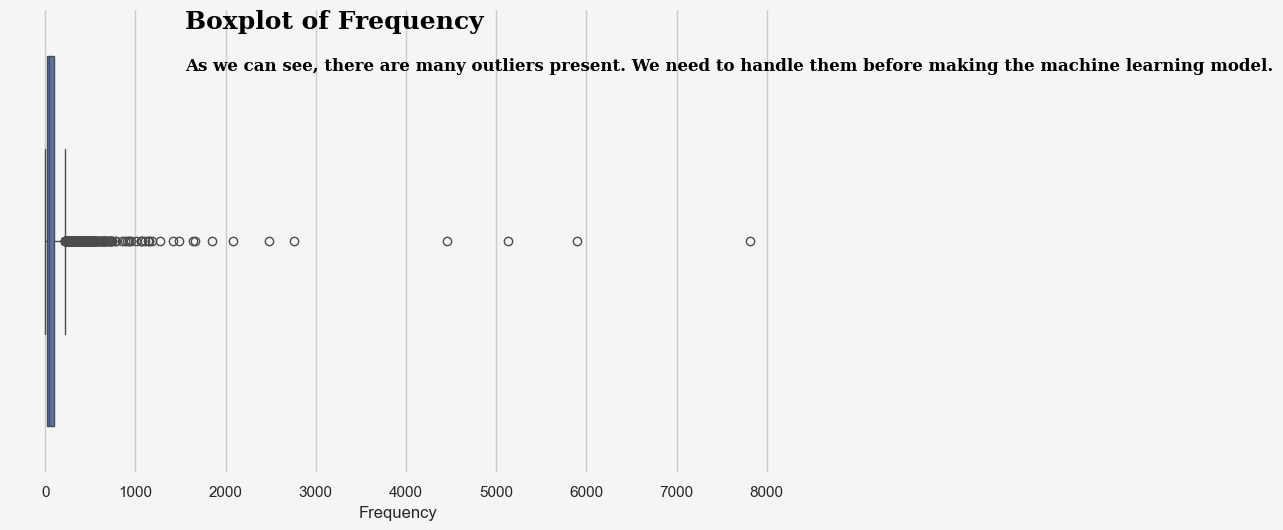

In [127]:
## Plot boxplot of 'Frequency'
boxplot(rmf_df, "Frequency", "Boxplot of Frequency", "As we can see, there are many outliers present. We need to handle them before making the machine learning model.")

c:\Users\Lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


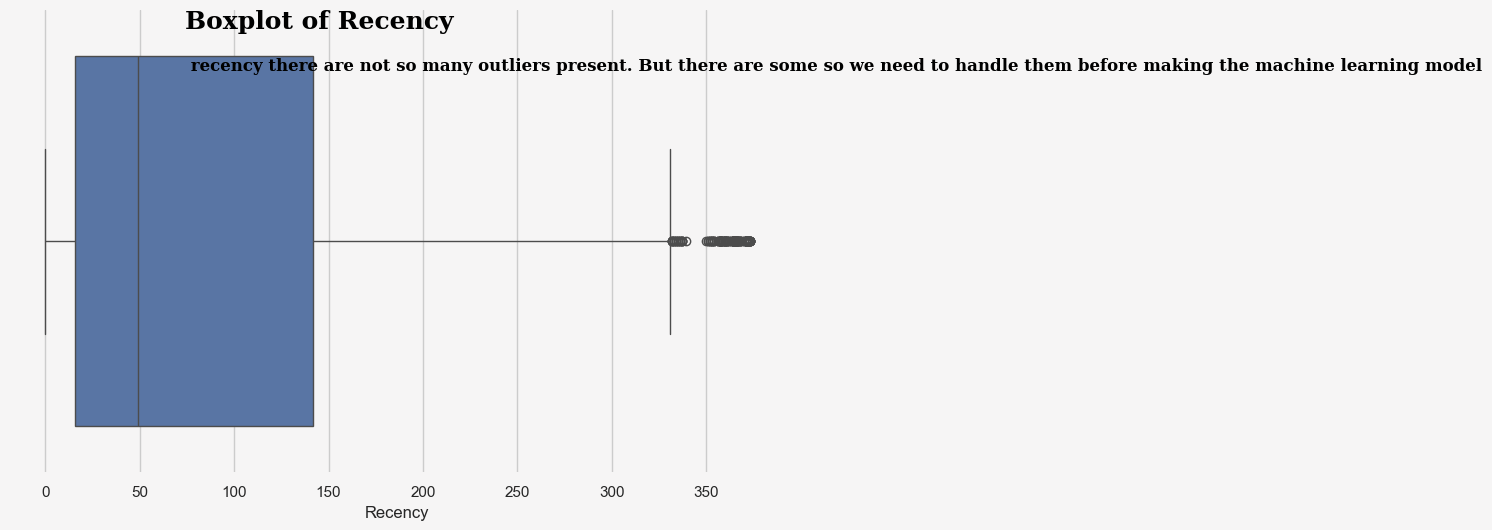

In [128]:
## Plot boxplot of 'Recency'
boxplot(rmf_df, "Recency", "Boxplot of Recency", " recency there are not so many outliers present. But there are some so we need to handle them before making the machine learning model")

## Handle Outliers

Now let's do some cleaning. As we know that there are so many outliers present in the data set. Let's handle that.

In [129]:
import numpy as np

def drop_outliers(df, field_name, multiplier=1.5):
    """
    Remove outliers from a DataFrame based on the specified field.

    Parameters:
    - df: DataFrame
    - field_name: str, column name for outlier detection
    - multiplier: float, controls the sensitivity for outlier detection (default is 1.5)
    """
    q1 = np.percentile(df[field_name], 25)
    q3 = np.percentile(df[field_name], 75)
    iqr = multiplier * (q3 - q1)

    lower_bound = q1 - iqr
    upper_bound = q3 + iqr

    df.drop(df[(df[field_name] > upper_bound) | (df[field_name] < lower_bound)].index, inplace=True)

# Example usage:
drop_outliers(rmf_df, 'Recency')
drop_outliers(rmf_df, 'Frequency')
drop_outliers(rmf_df, 'Monetary')

## Scaling

In [130]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

df = rmf_df[['Monetary', 'Frequency', 'Recency']]

scaler = StandardScaler()

rmf_scaled = scaler.fit_transform(df)
rmf_scaled

array([[-1.15322183, -1.03094235,  2.54968376],
       [ 1.6223993 , -0.39913159, -0.19989566],
       [ 1.56110286,  0.5159047 , -0.81334764],
       ...,
       [-1.02840505, -0.92200946,  0.96128131],
       [-0.88048436, -0.79128999, -0.93384714],
       [ 1.68423626,  0.45054496, -0.55043965]])

In [131]:
rfm_df_scaled = pd.DataFrame(rmf_scaled).rename(columns={0: 'Monetary', 1: 'Frequency', 2: 'Recency'})
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,-1.153222,-1.030942,2.549684
1,1.622399,-0.399132,-0.199896
2,1.561103,0.515905,-0.813348
3,-0.636781,-0.704144,2.374412
4,1.233478,0.995209,-0.627121


# Modeling

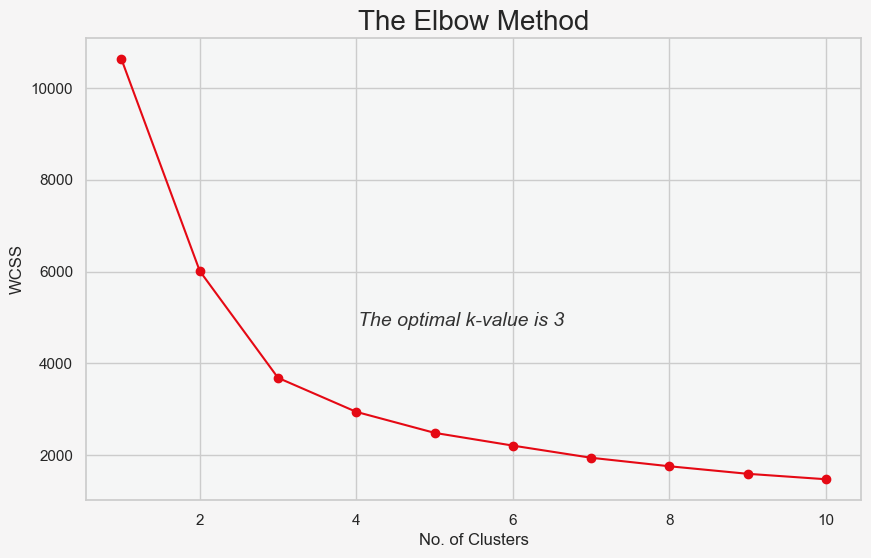

In [132]:
from sklearn.cluster import KMeans

def plot_elbow_method(x, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        km.fit(x)
        wcss.append(km.inertia_)

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Set background colors
    fig.patch.set_facecolor('#f6f5f5')
    ax.set_facecolor('#f5f6f6')

    # Plot the Elbow Method curve
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-', color='#E50914')
    
    # Title and labels
    plt.title('The Elbow Method', fontsize=20)
    plt.xlabel('No. of Clusters')
    plt.ylabel('WCSS')

    # Add text for the best k-value
    fig.text(0.5, 0.4, "The optimal k-value is 3", fontsize=14, ha='center', color='#333333', style='italic')

    # Show the plot
    plt.show()


X = rfm_df_scaled.copy()
plot_elbow_method(X, max_clusters=10)


         Recency  Frequency  Monetary
Cluster                              
0           -0.5       -0.3      -0.3
1            1.5       -0.6      -0.6
2           -0.6        1.4       1.4


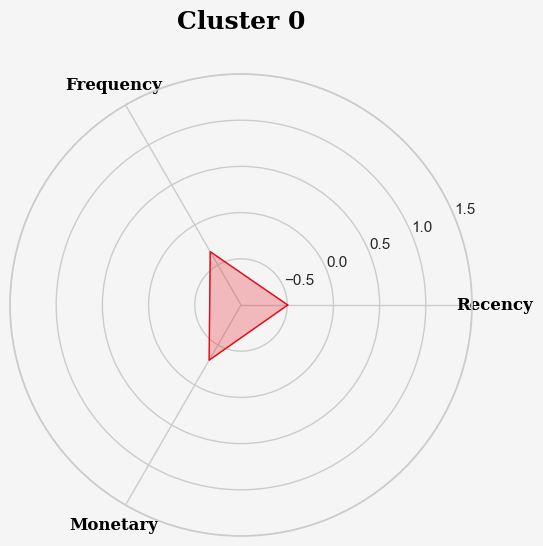

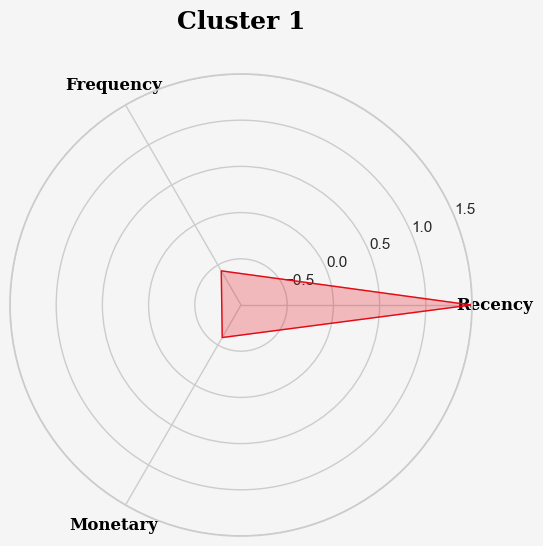

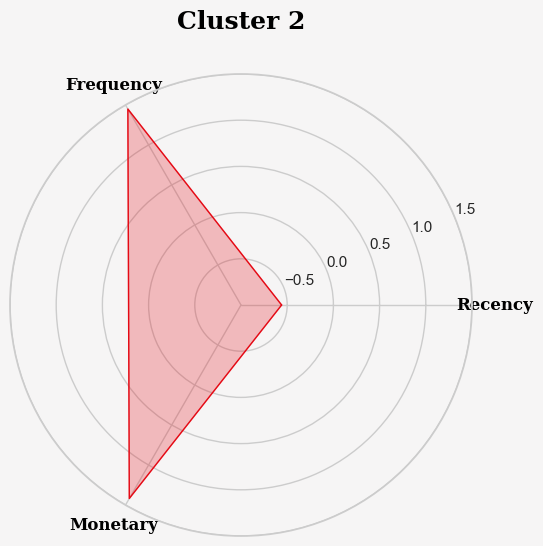

In [135]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model on the scaled data
kmeans.fit(rfm_df_scaled)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Create a DataFrame by adding a new cluster label column
rmf_df_scaled_cluster = rfm_df_scaled.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = rmf_df_scaled_cluster.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
# Print average values for each cluster
avg_values = grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(1)

print(avg_values)


def plot_radar_chart(grouped, cluster):
    """
    Plot a radar chart for a given cluster.

    Parameters:
    - grouped: DataFrameGroupBy object
    - cluster: int, cluster number
    """
    # Get the data for the specified cluster
    cluster_data = grouped.get_group(cluster)

    # Define variables for the plot
    labels = np.array(['Recency', 'Frequency', 'Monetary'])
    stats = cluster_data[['Recency', 'Frequency', 'Monetary']].mean().values
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
    stats = np.concatenate((stats, [stats[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

    # Set background colors
    fig.patch.set_facecolor('#f6f5f5')
    ax.set_facecolor('#f6f5f5')

    # Draw the plot
    ax.plot(angles, stats, color='#E50914', linewidth=1, linestyle='solid')
    ax.fill(angles, stats, color='#E50914', alpha=0.25)

    # Set the title
    ax.set_title(f'Cluster {cluster}', y=1.08, fontweight='bold', fontfamily='serif', fontsize=18, color='black')

    # Set the ticks
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontweight='bold', fontfamily='serif', fontsize=12, color='black')

    # Set grid
    ax.grid(True)

    # Set the same y-axis limit for all charts
    ax.set_ylim([-1, 1.5])  # Adjust the range as needed

    # Show the plot
    plt.show()

# Plot radar chart for Cluster 0
plot_radar_chart(grouped, cluster=0)

# Plot radar chart for Cluster 1
plot_radar_chart(grouped, cluster=1)

# Plot radar chart for Cluster 2
plot_radar_chart(grouped, cluster=2)
